In [20]:
from importlib import reload
import cpclasses
import NeuralNetworks
reload(cpclasses)
reload(NeuralNetworks)
from cpclasses import *
from NeuralNetworks import *
import torch



# One-Parameter Model

In [21]:
points = torch.tensor([[1., -0.5], [2., 0.5], [3., 1.5], [4., 2.5]])

In [22]:
model = OneParameter()

model.train_model(points[:,0], points[:,1], 1000, 0.01)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='x', ylabel='y'>

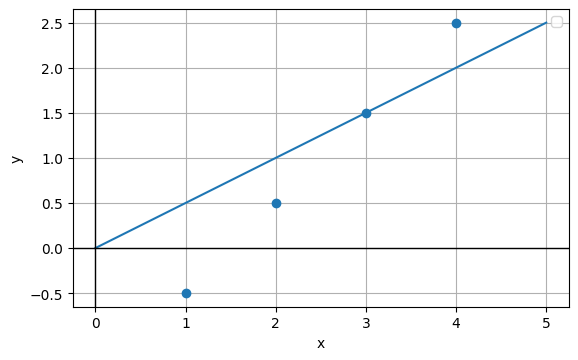

In [23]:
fig, ax = plt.subplots()

model.plot(ax, 0, 5)
ax.plot(points[:,0], points[:,1], 'o')
coordinate_axes(ax)
format_axis(ax)


# Linear Model


In [24]:
model = LinearModel()



model(points[:,0])

model.train_model(points[:,0], points[:,1], 1000, 0.01)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='x', ylabel='y'>

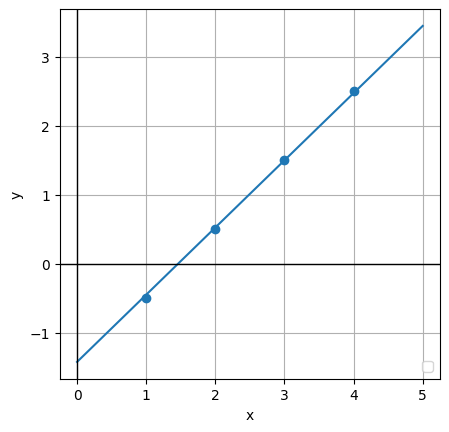

In [25]:
fig, ax = plt.subplots()

model.plot(ax, 0, 5)
ax.plot(points[:,0], points[:,1], 'o')
coordinate_axes(ax)
format_axis(ax)


In [26]:
model = LinearModel()
points = torch.tensor([[1., 1], [2., 1], [3., 1.5], [4., 2.5]])

model(points[:,0])   

model.train_model(points[:,0], points[:,1], 1000, 0.01)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='x', ylabel='y'>

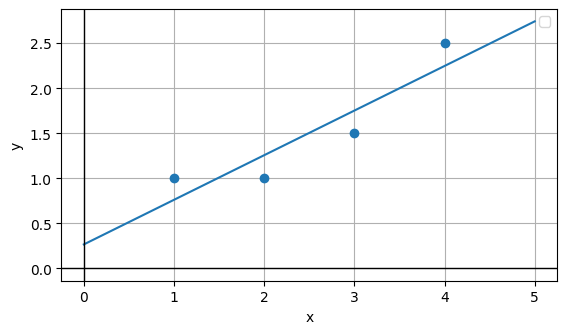

In [27]:
fig, ax = plt.subplots()

model.plot(ax, 0, 5)
ax.plot(points[:,0], points[:,1], 'o')
coordinate_axes(ax)
format_axis(ax)


# LinearModel + ReLU

In [28]:
model = LinearModelWithReLU()




model.train_model(points[:,0], points[:,1], 1000, 0.01)

Text(0.5, 0.98, 'Linear + ReLU')

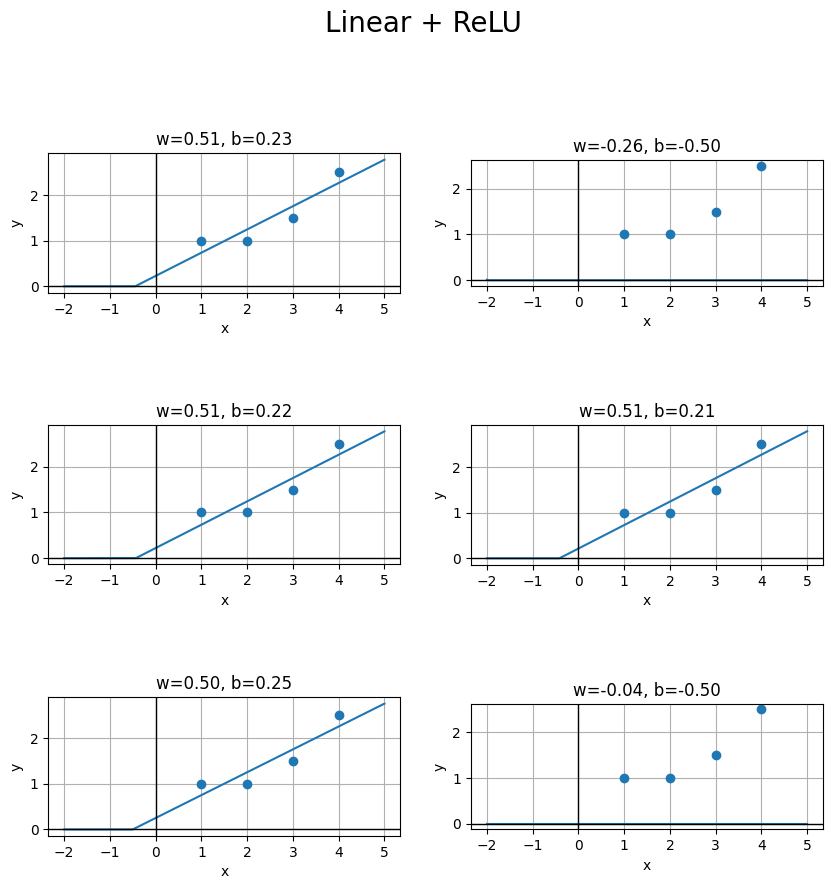

In [29]:
fig, axs = plt.subplots(3,2, figsize=(10,10))


for ax in axs.flatten():
    model  =LinearModelWithReLU()
    model.train_model(points[:,0], points[:,1], 1000, 0.01)
    model.plot(ax, -2, 5)
    ax.plot(points[:,0], points[:,1], 'o')

    coordinate_axes(ax)
    weight = model.layer1.weight.data[0].item()
    bias = model.layer1.bias.data[0].item()

    format_axis(ax, title=f'w={weight:.2f}, b={bias:.2f}', legend = False)

fig.suptitle('Linear + ReLU', fontsize=20)

Text(0.5, 0.98, 'Linear + ReLU')

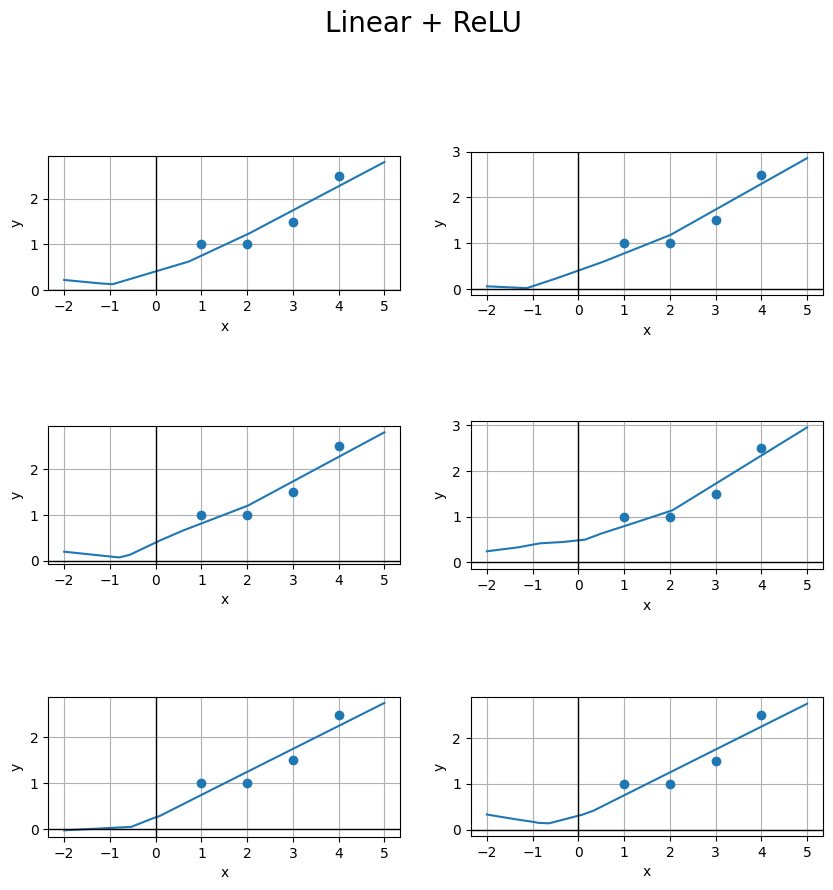

In [30]:
fig, axs = plt.subplots(3,2, figsize=(10,10))


for ax in axs.flatten():
    model  = TwoLayerWithReLU()
    model.train_model(points[:,0], points[:,1], 1000, 0.01)
    model.plot(ax, -2, 5)
    ax.plot(points[:,0], points[:,1], 'o')

    coordinate_axes(ax)
    format_axis(ax, title='', legend = False)

fig.suptitle('Linear + ReLU', fontsize=20)

Text(0.5, 0.98, '8x1 Linear + ReLU + 1x8 Linear')

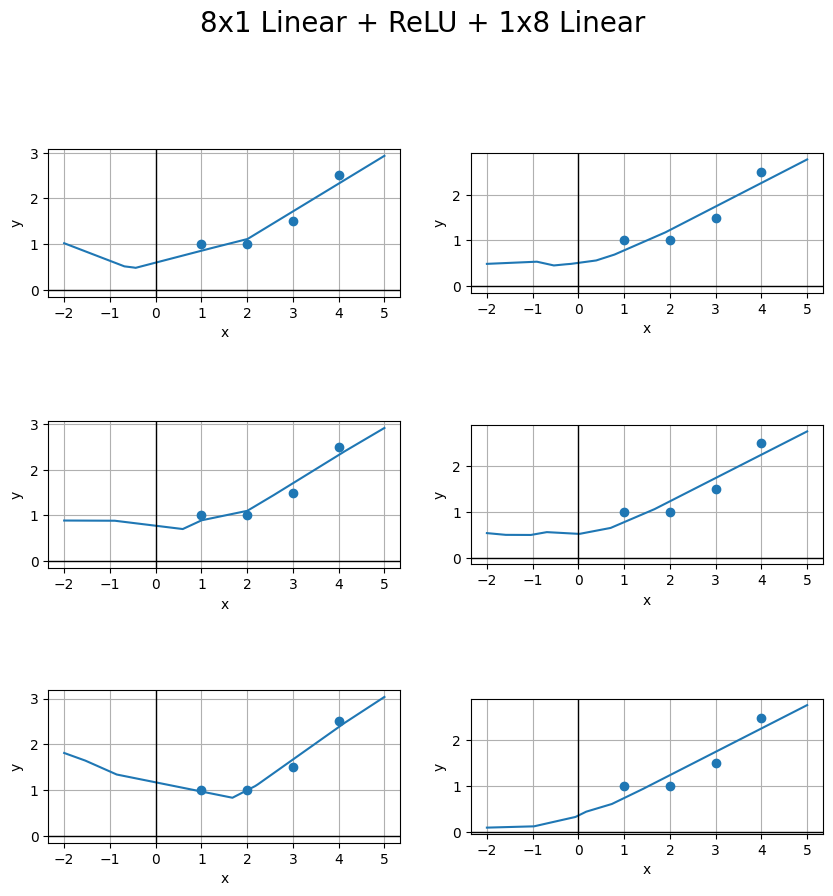

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(10,10))


for ax in axs.flatten():
    activation_function = torch.nn.ReLU()
    model  = Two_8_LayerCustomActivation(torch.nn.ReLU())
    model.train_model(points[:,0], points[:,1], 1000, 0.01)
    model.plot(ax, -2, 5)
    ax.plot(points[:,0], points[:,1], 'o')

    coordinate_axes(ax)
    format_axis(ax, title='', legend = False)

fig.suptitle('1x8 Linear + ReLU + 8x1 Linear', fontsize=20)

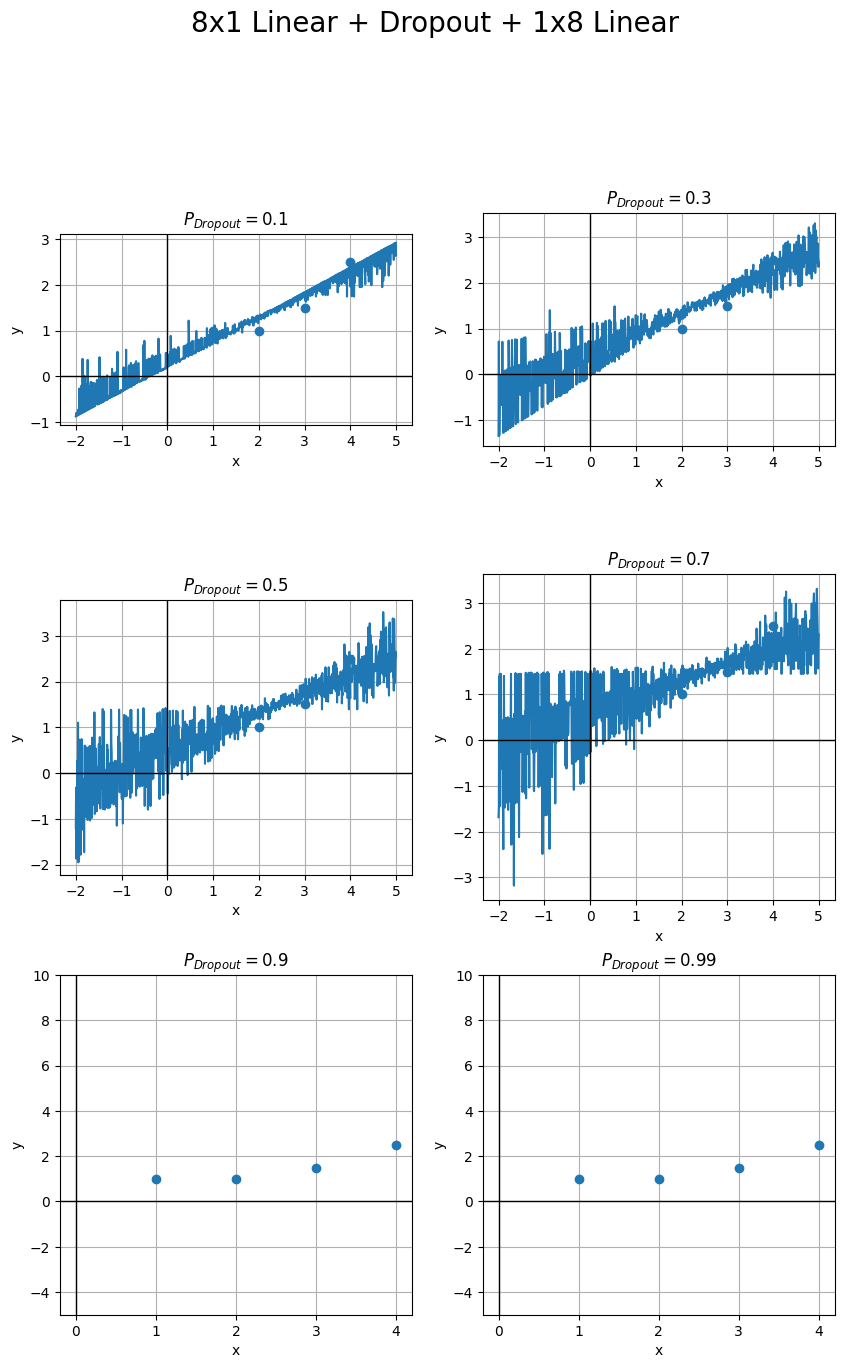

In [39]:
fig, axs = plt.subplots(3,2, figsize=(10,15))

probabilities = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]


for ax, p in zip(axs.flatten(), probabilities):
    activation_function = torch.nn.ReLU()
    model  = Two_8_LayerDropoutLayer(p)
    model.train_model(points[:,0], points[:,1], 10000, 0.01)
    model.plot(ax, -2, 5)
    ax.plot(points[:,0], points[:,1], 'o')

    coordinate_axes(ax)
    format_axis(ax, title=r'$P_{Dropout} = $' + f'{p}', legend = False)

fig.suptitle('1x8 Linear + Dropout + 8x1 Linear', fontsize=20)

for ax in axs.flatten()[-2:]:
    ax.set_ylim(-5, 10)
    ax.set_aspect('auto')

plt.savefig('Figures/1x8_Linear_Dropout_8x1_Linear.png')